intervalul de timp acoperit:  761
frecventa de esantionare a semnalului:  24.031537450722734
frecventa maxima prezenta in semnal:  12.015768725361367


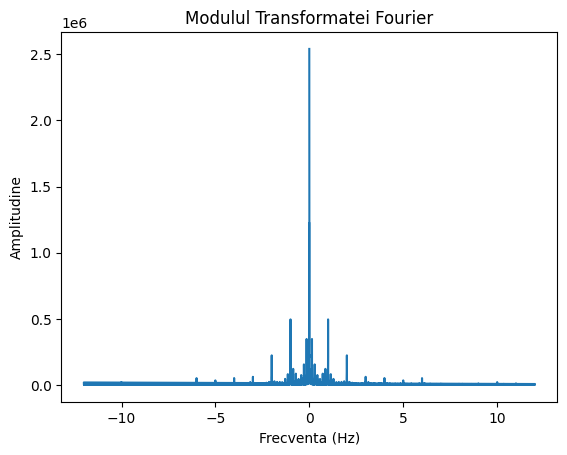

[2541266.              +0.j          443568.77859794+1139321.9878816j
  250542.70578069 +593361.61620651j ...   45313.59694201 -458990.47577768j
  250542.70578069 -593361.61620651j  443568.77859794-1139321.9878816j ]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

file_path = 'Train.csv'
numar_esantioane = 18288
date_format = "%d-%m-%Y %H:%M"
data_start = datetime.strptime("25-08-2012 00:00", date_format)
data_end = datetime.strptime("25-09-2014 23:00", date_format)

# b
durata_totala = (data_end - data_start).days
print("intervalul de timp acoperit: " , durata_totala)

# a
frecventa = numar_esantioane / durata_totala
print("frecventa de esantionare a semnalului: " , frecventa)

# c
frecventa_maxima = frecventa / 2
print("frecventa maxima prezenta in semnal: ", frecventa_maxima)

#d
semnal = np.genfromtxt('Train.csv', delimiter=',',skip_header=1, usecols=2)
transformata_fourier = np.fft.fft(semnal)
frecvente = np.fft.fftfreq(numar_esantioane, 1 / frecventa)

transformata_fourier = transformata_fourier[:numar_esantioane]
frecvente = frecvente[:numar_esantioane]

plt.plot(frecvente, np.abs(transformata_fourier))
plt.title('Modulul Transformatei Fourier')
plt.xlabel('Frecventa (Hz)')
plt.ylabel('Amplitudine')
plt.show()

#e
transformata_fourier_fara_dc = transformata_fourier - transformata_fourier[0] #eliminarea componentei continue - cea egala cu 0Hz

semnal_fara_dc = np.fft.ifft(transformata_fourier_fara_dc)
# plt.figure(figsize=(12, 6))
# plt.subplot(2, 1, 1)
# plt.plot(frecvente, np.abs(transformata_fourier))
# plt.title('Modulul Transformatei Fourier - Semnal Initial')
# plt.xlabel('Frecventa (Hz)')
# plt.ylabel('Amplitudine')
# plt.subplot(2, 1, 2)
# plt.plot(semnal_fara_dc.real)
# plt.title('Semnal fara Componenta Continua')
# plt.xlabel('Esantioane')
# plt.ylabel('Amplitudine')
# plt.tight_layout()
# plt.show()

#f
print(transformata_fourier)
#cautam primele 4 cele mai mari valori ale modulului transformatei
cele4pozitii = np.argsort(transformata_fourier)[-4]

# indice_frecvente_principale = np.argsort(np.abs(transformata_fourier))[::-1][:4]

# print("Frecventele principale și valorile corespunzătoare:")
# for indice in indice_frecvente_principale:
#     frecventa_principala = frecvente[indice]
#     amplitudine_principala = np.abs(transformata_fourier[indice])
#     print("Frecvența: {:.2f} Hz, Amplitudine: {:.2f}".format(frecventa_principala, amplitudine_principala))